In [2]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error as mse
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import validation_curve

%matplotlib inline

# 1. Model: Technical data and eod prices only

## Get data

In [9]:
#Get data
data = pd.read_csv('Master_with_technicals_news.csv')

#Get ticker data
tickers = pd.read_csv("tickers_list_news.csv")['0'].values
#Create ticker dataframe
index = []
for i in range(len(tickers)):
    index.append(i)
tickers_df = pd.DataFrame({'Index':index, 'Ticker':tickers}).reset_index(drop=True)
tickers_dict = tickers_df['Ticker'].to_dict()

tickers_dict = {value: key for key, value in tickers_dict.items()}

In [3]:
#split data into X and Y
X = data.drop(["date","returns_pred"], axis = 1)

X['index_ticker']=X['Ticker'].map(tickers_dict)

y = data["prev_returns"].copy()

In [15]:
#Set date to datetime and as index

data_all["date"] = pd.to_datetime(data_all["date"])
data_all.set_index('date', inplace = True)

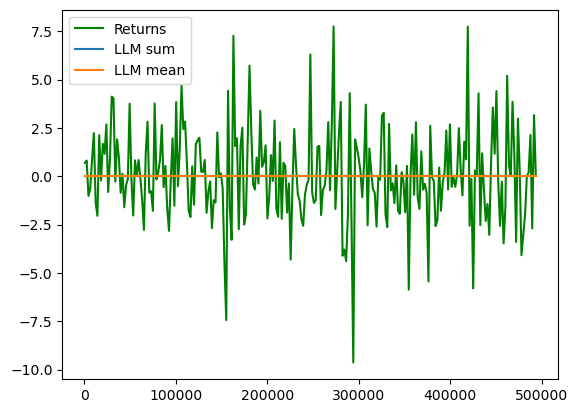

In [35]:
data_all = pd.read_csv('final_df.csv', sep = ';')
data_all = data_all[data_all['Ticker']=='GOOG']
plt.figure()
plt.plot(data_all["returns"], label = "Returns", color = "green")
plt.plot(data_all["LLM_score_sum"], label = "LLM sum")
plt.plot(data_all["LLM_score_mean"], label = "LLM mean")
plt.legend()

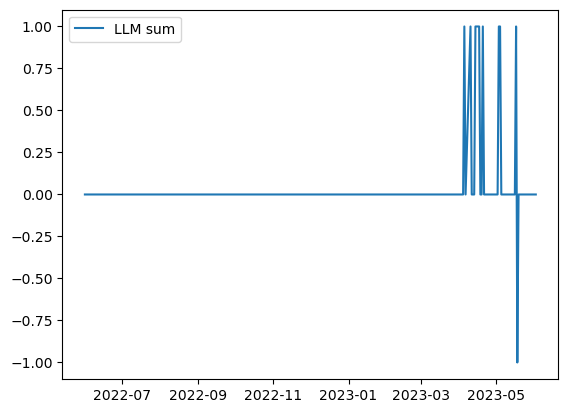

In [71]:
data_all = pd.read_csv('final_df.csv', sep = ';')
data_all["date"] = pd.to_datetime(data_all["date"])
data_all = data_all[data_all['Ticker']=='AAPL']
data_all.set_index('date', inplace = True)
plt.figure()
plt.plot(data_all["LLM_score_sum"], label = "LLM sum")
#plt.plot(data_all["LLM_score_mean"], label = "LLM mean")
plt.legend()

(array([12.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.0000000e+00, 2.2468850e+04, 4.4936700e+04, 6.7404550e+04,
        8.9872400e+04, 1.1234025e+05, 1.3480810e+05, 1.5727595e+05,
        1.7974380e+05, 2.0221165e+05, 2.2467950e+05, 2.4714735e+05,
        2.6961520e+05, 2.9208305e+05, 3.1455090e+05, 3.3701875e+05,
        3.5948660e+05, 3.8195445e+05, 4.0442230e+05, 4.2689015e+05,
        4.4935800e+05]),
 <BarContainer object of 20 artists>)

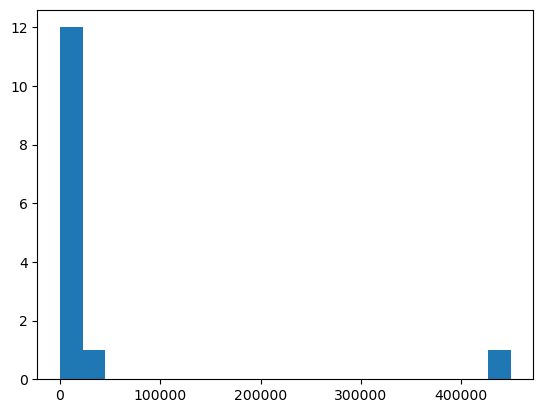

In [70]:
data_all = pd.read_csv('final_df.csv', sep = ';')
val = data_all['LLM_score_sum'].value_counts()

plt.hist(val, bins = 20)

In [66]:
data_all

,Unnamed: 0,open,high,low,adjusted_close,volume,RSI,MFI,volatility,returns,prev_returns,returns_pred,Ticker,LLM_score_sum,LLM_score_mean
date,,,,,,,,,,,,,,,
2023-06-02,4,181.03,181.78,179.26,180.7060,61945900,36.976220,45.237000,0.009638,0.477572,1.602217,-0.757141,AAPL,0.0,0.0
2023-06-01,1968,177.70,180.12,176.93,179.8471,68901800,35.154057,44.470879,0.009446,1.602217,-0.028182,0.477572,AAPL,0.0,0.0
2023-05-31,4413,177.33,179.35,176.76,177.0110,99625300,29.912287,42.278856,0.009482,-0.028182,1.065965,1.602217,AAPL,0.0,0.0
2023-05-30,6714,176.96,178.99,176.57,177.0609,55964400,30.109749,36.842891,0.008536,1.065965,1.410481,-0.028182,AAPL,0.0,0.0
2023-05-26,8916,173.32,175.77,173.11,175.1934,54835000,27.039432,27.577661,0.008679,1.410481,0.669198,1.065965,AAPL,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-07,556002,144.35,149.00,144.10,147.6279,67808200,59.034533,41.779375,0.024098,1.758588,0.522719,-0.504308,AAPL,0.0,0.0
2022-06-06,558213,147.03,148.57,144.90,145.0766,71598400,55.125537,35.650936,0.024397,0.522719,-3.855514,1.758588,AAPL,0.0,0.0
2022-06-03,560388,146.90,147.97,144.46,144.3222,88570300,53.987191,35.575976,0.023831,-3.855514,1.681119,0.522719,AAPL,0.0,0.0
